 # **Cardio Good Fitness - Project**

> Author : Jaishankar Bharadwaj




---



# **Cardio Good Fitness Project - Problem Statement**

*Objective*

*   Explore the dataset to identify differences between the customers of each product
*   You can also explore relationships between the different attributes of the customers
*   You can approach it from any other line of questioning that you feel could be relevant for the business
*   The idea is to get you comfortable working in Python

*Expectations*

*   Come up with a customer profile (characteristics of a customer) of the different products
*   Perform univariate and multivariate analyses
*   Generate a set of insights and recommendations that will help the company in targeting new customers.


**Data Dictionary**

The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

Product - The model no. of the treadmill

Age -  Age of the customer in no of years

Gender - Gender of the customer

Education - Education of the customer in no. of years

Marital Status - Marital status of the customer

Usage - Avg. # times the customer wants to use the treadmill every week

Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)

Income - Income of the customer

Miles- Miles that a customer expects to run

#1.0 Data Structure Analysis and Sanity Check

In this section the following is done


*   Import the python libraries for numpy, pandas, matplotlib and seaborn
*   Set the Pandas formats for float to 2 decimal places

*   Mount the Google Drive
*   Load the CardioGoodFitness.csv into Google drive
*   Load the CardioGoodFitness.csv from Google Drive to Pandas Dataframe

*   Display the header (first 5 rows) to check loading is doneinto dataframe
*   Display the column data types
*   Analyze how many object columns and numerical and date columns are there

*   Check the missing values in the data
*   Replace missing values with NaN.

*   Find Duplicated rows in dataset and remove them
*   Display the descriptive statistics of the dataset















## 1.1 Import Python Libraries

In [ ]:
# Importing the Libraries to read and manipulating data
import numpy as np
import pandas as pd

# importing Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Python command to display the graphs inline
%matplotlib inline

In [ ]:
# Set the pandas float to 2 decimals
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 1.2 Mount Google Drive and Load dataset

In [ ]:
# Mount the Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Before loading the dataset into Pandas dataframe, Copy the CardioGoodFitness.csv into the  google drive

In [ ]:
# Read the dataset into a Pandas dataframe
df = pd.read_csv('/content/CardioGoodFitness.csv')

## 1.3 Data Structure Analysis

In [ ]:
# display the first 5 rows to verify data is loaded into dataframe
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [ ]:
# Print the number of rows and columns in the dataset
print('CardioGoodFitness.csv has ',df.shape[0], ' rows and ', df.shape[1], 'columns')

CardioGoodFitness.csv has  180  rows and  9 columns


In [ ]:
# display the information about the columns in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


**Observation on Column types**

There are 3 object columns and 6 numerical columns and NO date columns.

## 1.4 Data Sanity Check

In [ ]:
# Check if any column has null values
df.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

**Observation on Null values**

None of the columns have Null values

In [ ]:
# Duplicated rows count
df.duplicated().sum()

0

**Observations on Duplicate Rows**

*   There are no Duplicate rows.



In [ ]:
# Statistical analysis of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.00,28.79,6.94,18.00,24.00,26.00,33.00,50.00
Education,180.00,15.57,1.62,12.00,14.00,16.00,16.00,21.00
Usage,180.00,3.46,1.08,2.00,3.00,3.00,4.00,7.00
Fitness,180.00,3.31,0.96,1.00,3.00,3.00,4.00,5.00
Income,180.00,53719.58,16506.68,29562.00,44058.75,50596.50,58668.00,104581.00
Miles,180.00,103.19,51.86,21.00,66.00,94.00,114.75,360.00


**Observation - Statistical Analysis of Dataset**

*   The mean age of the customer is 28.79
*   Average education of customer is 16 years
*   The Median and the 75% percentile of the Education column has same value of 16.
*   Customer wants to use the treadmill at a minimum 2 times a week
*   75% of customer's rate their fitness score of 4.00 or less
*   The mean income of customer is 53719.58
*   Average miles. customer expected to run is 94 miles.









#2.0 Univariate Data Analysis

In this section the following is done

*   There are 3 Object Column types (Product, Gender, Marital Status)
*   For Each Object Column type do a Countplot to get value counts
*   Check the count and percentage of columns having categorical Data.

*   There are 6 Numerical Column types (Age, Education, Usage,Fitness, Income, Miles)
*   For Each Numerical column do the Hist and Box plot to understand the data skewness and outliers

*   Do Outlier analysis and treat the columns for Outliers








In [ ]:
# Define a function to plot the histogram and box plot
# This function was used in honeycomb production case study and being re-used.

def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize)  # creating the 2 subplots

    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="violet")  # boxplot will be created and a star will indicate the mean value of the column

    if bins:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else:
      sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)  # For histogram

    ax_box2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the bx plot

    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")  # Add mean to the histogram

    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")  # Add median to the histogram

## 2.1 Product - Column Analysis

In [ ]:
# Print the counts for each product types
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

In [ ]:
# Print the percentage for each product types
df['Product'].value_counts(normalize=True)

TM195   0.44
TM498   0.33
TM798   0.22
Name: Product, dtype: float64

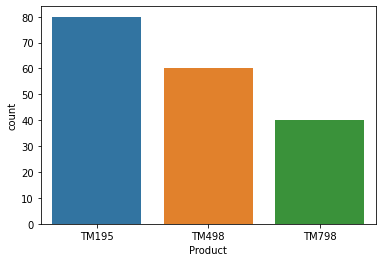

In [ ]:
# Countplot on Product.
sns.countplot(data=df, x='Product')
plt.show()

**Observation on Product**

*   There are 3 Model # in Product  in the dataset
*   Model TM195 has 80 counts, TM498 has 60 counts and TM798 has 40 counts

*   In the dataset, in terms of percentage 44% of treadmills are TM195, 33% are TM498 and 22% are TM798





## 2.2 Gender - Column Analysis

In [ ]:
# Print the Counts for Gender
df['Gender'].value_counts()

Male      104
Female     76
Name: Gender, dtype: int64

In [ ]:
# Print the percentage for Gender
df['Gender'].value_counts(normalize=True)

Male     0.58
Female   0.42
Name: Gender, dtype: float64

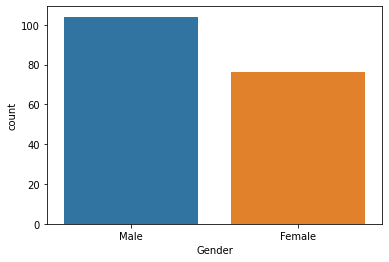

In [ ]:
# Countplot on Gender.
sns.countplot(data=df, x='Gender')
plt.show()

**Observation on Gender**

*   In the dataset there are 104 customers who are male and 76 are female
*   In the dataset 58% are male and 42% are Female.



## 2.3 Marital Status - Column Analysis

In [ ]:
# Print the Counts for Marital Status
df['MaritalStatus'].value_counts()

Partnered    107
Single        73
Name: MaritalStatus, dtype: int64

In [ ]:
# Print the percentage for Marital Status
df['MaritalStatus'].value_counts(normalize=True)

Partnered   0.59
Single      0.41
Name: MaritalStatus, dtype: float64

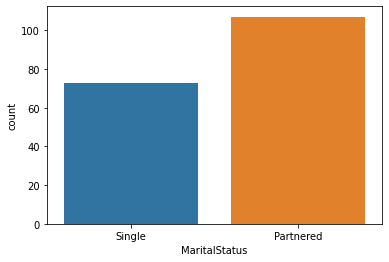

In [ ]:
# Countplot on Marital Status
sns.countplot(data=df, x='MaritalStatus')
plt.show()

**Observation on Marital Status**

*   In the dataset there are 107 customers who are Partnered and 73 are Single

*   In terms of Percentage 59% are Partnered and 41% are single in the dataset



**Function to find the Whisker Boundaries**

***Assumptions.***

As numerical features like fitness, usage, and education have discrete data, and their standard deviation is small, instead of using  IQR scale as 1.5 , we will use IQR scale as 1.0 for adding and subtracting  from Q3 and Q1. to find whisker boundaries

For Age we will use  IQR scale as 1.5 as standard deviation is high with many outliers

For Income and Miles the standard deviation is high and and there are too many outliers. Outlier Treatments for Income and  Miles will skew the data,and no Treatment is done.



In [ ]:
# define a function to get max whisker boundary
# IQR*1.5 and add the third quantile to get the whisker Boundary
# IQR is third_quantile - first_quantile
# outlier is a number which is less than Q1 or greater than Q3 by more than 1.5 times IQR

def get_MaxWhisker(first_Quantile, third_Quantile,iqr_Scaling=1.5):
  whisker_boundary = third_Quantile + (third_Quantile - first_Quantile)*iqr_Scaling
  return whisker_boundary

In [ ]:
# define a function to get min whisker boundary
# IQR*1.0 and subtract from first quantile to get the min whisker Boundary
# IQR is third_quantile - first_quantile
#outlier is a number which is less than Q1 or greater than Q3 by more than 1.5 times IQR

def get_MinWhisker(first_Quantile, third_Quantile,iqr_Scaling=1.5):
  whisker_boundary =  first_Quantile - (third_Quantile - first_Quantile)*iqr_Scaling
  return whisker_boundary

In [ ]:
# define a function to print the whiskers
def print_Whisker_Values(df,cols,iqr_Scaling=1.5):
  print('Whisker details for', cols, 'Column:')
  max_whisker = get_MaxWhisker(df[cols].quantile(0.25), df[cols].quantile(0.75),iqr_Scaling)
  min_whisker = get_MinWhisker(df[cols].quantile(0.25), df[cols].quantile(0.75),iqr_Scaling)
  print('\n Left-side Whisker  :',min_whisker, '\n Right-side Whisker :',max_whisker)
  print(' Total num outliers :',((df[cols] < min_whisker) | (df[cols] > max_whisker)).sum())
  print('\n The max Outlier values:')
  print(df[df[cols]>max_whisker ][cols].value_counts())
  print('\n The min Outlier values:')
  print(df[df[cols]<min_whisker ][cols].value_counts())

In [ ]:
# define function to Clip outliers
def clip_Outliers(df,cols,iqr_Scaling=1.5):
  max_whisker = get_MaxWhisker(df[cols].quantile(0.25), df[cols].quantile(0.75),iqr_Scaling)
  min_whisker = get_MinWhisker(df[cols].quantile(0.25), df[cols].quantile(0.75),iqr_Scaling)
  df2 = pd.DataFrame()
  df2[cols] = np.clip(df[cols], min_whisker, max_whisker)
  return df2

## 2.4 Age - Column Analysis

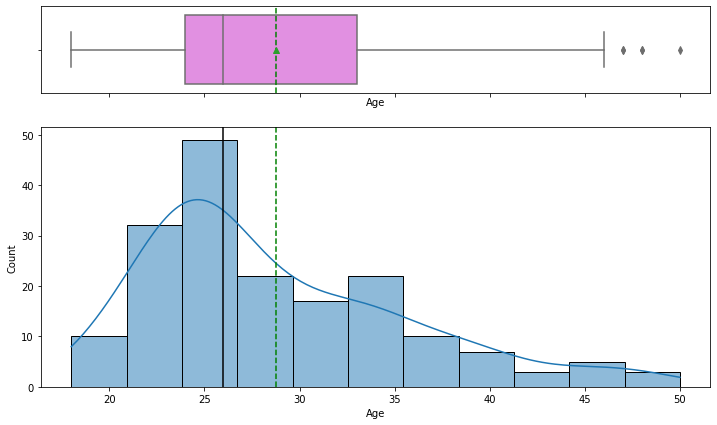

In [ ]:
# Create the Histogram and  Box Plot for the Age Column
histogram_boxplot(df,'Age', kde=True)

In [ ]:
# Print the Whisker values for Age Column
print_Whisker_Values(df,'Age')

Whisker details for Age Column:

 Left-side Whisker  : 10.5 
 Right-side Whisker : 46.5
 Total num outliers : 5

 The max Outlier values:
47    2
48    2
50    1
Name: Age, dtype: int64

 The min Outlier values:
Series([], Name: Age, dtype: int64)


**Observation on Age Column**


*   Age Column is Skewed right
*   There are 5 data points which are outliers (above 46.5)
*   75% of the customers have age below or equal to 33





## 2.5 Education - Column Analysis

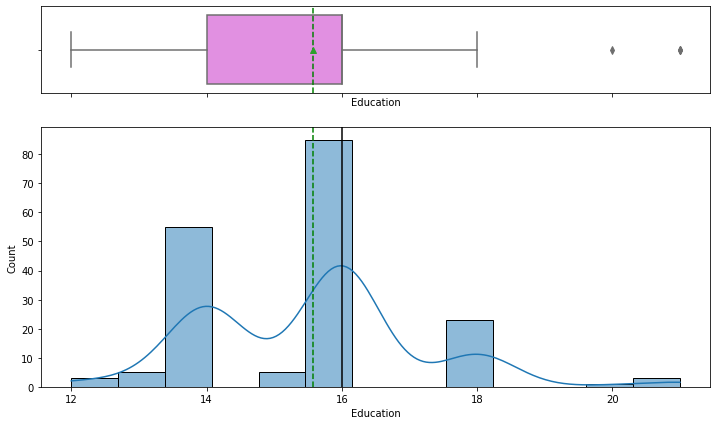

In [ ]:
# Create the Histogram and  Box Plot for the Age Column
histogram_boxplot(df,'Education', kde=True)

In [ ]:
# Print the Whisker values for Education Column
print_Whisker_Values(df,'Education',iqr_Scaling=1.0)

Whisker details for Education Column:

 Left-side Whisker  : 12.0 
 Right-side Whisker : 18.0
 Total num outliers : 4

 The max Outlier values:
21    3
20    1
Name: Education, dtype: int64

 The min Outlier values:
Series([], Name: Education, dtype: int64)


**Observation on Education Column**

*   Education column is multi-modal and not normally distributed
*   There are 4 data points that are outliers (above 19)




## 2.6 Usage - Column Analysis

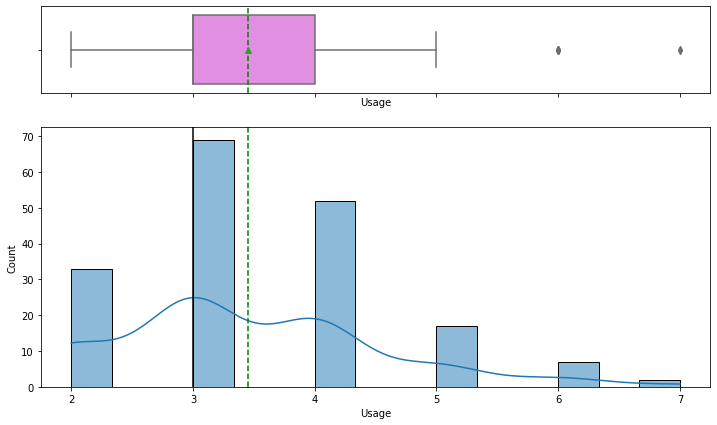

In [ ]:
# Create the Histogram and  Box Plot for the Age Column
histogram_boxplot(df,'Usage', kde=True)

In [ ]:
# Print the Whisker values for Usage Column
print_Whisker_Values(df,'Usage',iqr_Scaling=1.0)

Whisker details for Usage Column:

 Left-side Whisker  : 2.0 
 Right-side Whisker : 5.0
 Total num outliers : 9

 The max Outlier values:
6    7
7    2
Name: Usage, dtype: int64

 The min Outlier values:
Series([], Name: Usage, dtype: int64)


**Observation on Usage Column**


*  The Usage column is right skewed and multi-modal
*  There are 9 observations which are outliers having usage greater than 5



## 2.7 Fitness - Column Analysis

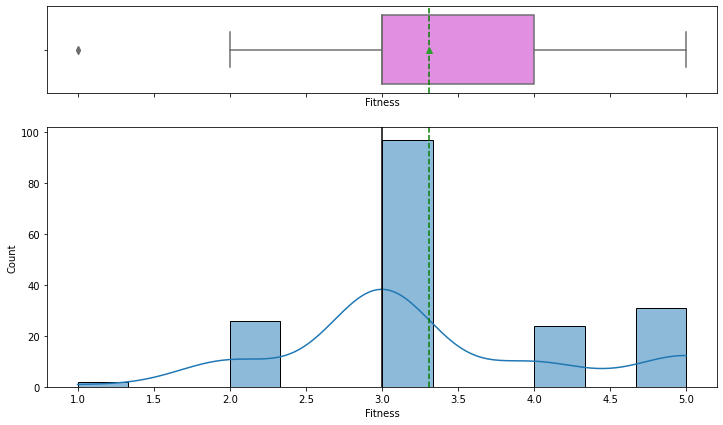

In [ ]:
# Create the Histogram and  Box Plot for the Age Column
histogram_boxplot(df,'Fitness', kde=True)

In [ ]:
# Print the Whisker values for Fitness Column
print_Whisker_Values(df,'Fitness',iqr_Scaling=1.0)

Whisker details for Fitness Column:

 Left-side Whisker  : 2.0 
 Right-side Whisker : 5.0
 Total num outliers : 2

 The max Outlier values:
Series([], Name: Fitness, dtype: int64)

 The min Outlier values:
1    2
Name: Fitness, dtype: int64


**Oservation on Fitness column**


*   The distribution looks nearly normal even though the right side tail is fatter
*   There are 2 data points which are outliers to the left (less than 1.5).



## 2.8 Income - Column Analysis

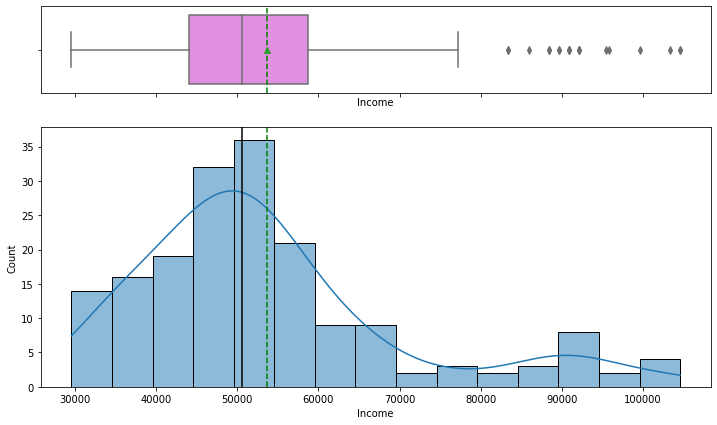

In [ ]:
# Create the Histogram and  Box Plot for the Age Column
histogram_boxplot(df,'Income', kde=True)

In [ ]:
# Print the Whisker values for Income Column
print_Whisker_Values(df,'Income')

Whisker details for Income Column:

 Left-side Whisker  : 22144.875 
 Right-side Whisker : 80581.875
 Total num outliers : 19

 The max Outlier values:
90886     3
92131     3
83416     2
88396     2
89641     2
104581    2
85906     1
103336    1
99601     1
95866     1
95508     1
Name: Income, dtype: int64

 The min Outlier values:
Series([], Name: Income, dtype: int64)


**Observations on Income Column**


*   The Income column is Right Skewed
*   There are 19 datapoints which are outliers having. income greater than 80581.87



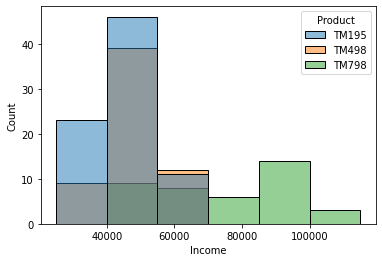

In [ ]:
# Use the bins
sns.histplot(data=df,x='Income',bins=[25000,40000,55000,70000,85000,100000,115000],hue='Product')
plt.show()

In [ ]:
# Find maximum Income of customer using a product
df.groupby('Product')['Income'].max()

Product
TM195     68220
TM498     67083
TM798    104581
Name: Income, dtype: int64

In [ ]:
# Number of customers who use TM798 and who earn more than the customers using TM195 and TM498.
df[df['Income'] > 68220].count()

Product          24
Age              24
Gender           24
Education        24
MaritalStatus    24
Usage            24
Fitness          24
Income           24
Miles            24
dtype: int64

There are 24 Customers who earn more than 68220 use  TM798 Machine.

The Income amount 68220 is the maximum amount earned by customers using TM195 and TM498

## 2.9 Miles - Column Analysis

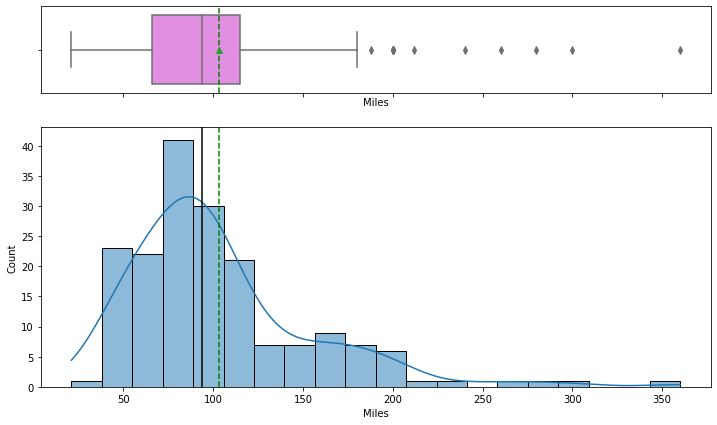

In [ ]:
# Create the Histogram and  Box Plot for the Miles Column
histogram_boxplot(df,'Miles', kde=True)

In [ ]:
# Print the Whisker values for Miles Column
print_Whisker_Values(df,'Miles')

Whisker details for Miles Column:

 Left-side Whisker  : -7.125 
 Right-side Whisker : 187.875
 Total num outliers : 13

 The max Outlier values:
200    6
188    1
212    1
240    1
300    1
280    1
260    1
360    1
Name: Miles, dtype: int64

 The min Outlier values:
Series([], Name: Miles, dtype: int64)


**Observation on Miles Column**


*   The Miles Column in right Skewed
*   There are 13 datapoints that are outliers ( having Miles value greater than 187.875



## 2.10 Outlier Analysis and Treatment

In this section we do the Outlier analysis of numerical features

Start with the box plots of numerical variables together in a single view.

If the number of outliers are large then it may not be prudent to fix the outliers and more research is needed.

If there are few outliers then it can be fixed using IQR method.

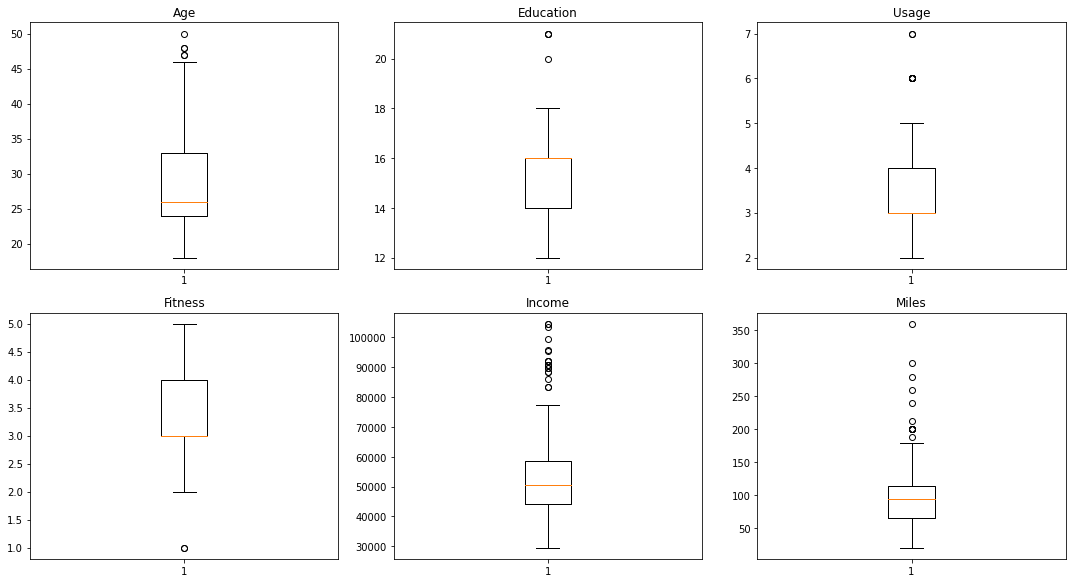

In [ ]:
#Outliers box plots of all numerical variables
numerical_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]
plt.figure(figsize=(15,12))

for i, col in enumerate(numerical_columns):
  plt.subplot(3,3,i+1)
  plt.boxplot(df[col],whis=1.5)
  plt.tight_layout()
  plt.title(col)

plt.show()

**Observations on Outliers**

*   Income and Miles have more outliers, so removing the outliers or using IQR method may not be advisable
*   Age, Education, Fitness and usage have very less  outliers and we can use IQR method o treat outliers







### 2.10.1 Fixing the Outliers of  Age Column

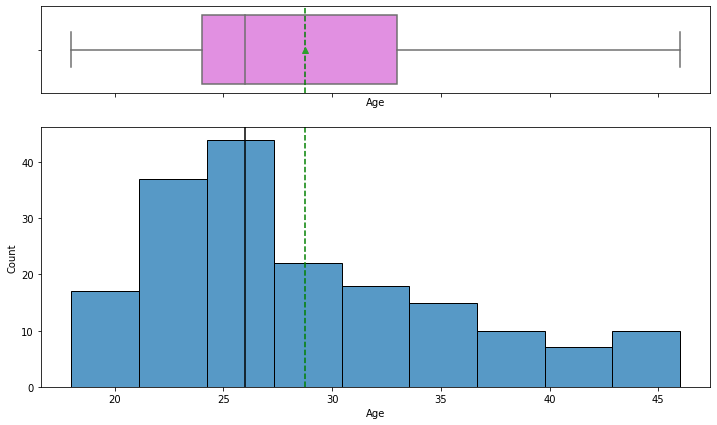

In [ ]:
#Clip the Outliers to be within  min and max.
df['Age'] = clip_Outliers(df,'Age').astype(int)
# Create the Box and Hist plot to check if the outliers are clipped
histogram_boxplot(df,'Age')

The Outliers of Age column is fixed

### 2.10.2 Fixing the Outliers of Education Column

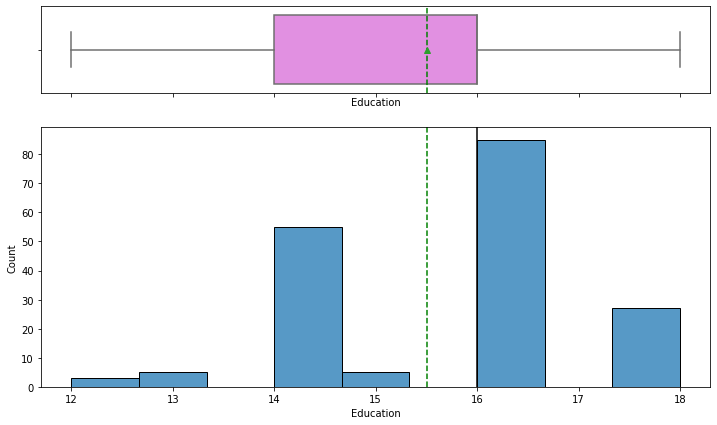

In [ ]:
df['Education'] = clip_Outliers(df,'Education',iqr_Scaling=1.0).astype(int)
# Create the Box and Hist plot to check if the outliers are clipped
histogram_boxplot(df,'Education')

The Outliers of Education column is fixed

### 2.10.3 Fixing the Outliers of Fitness Column

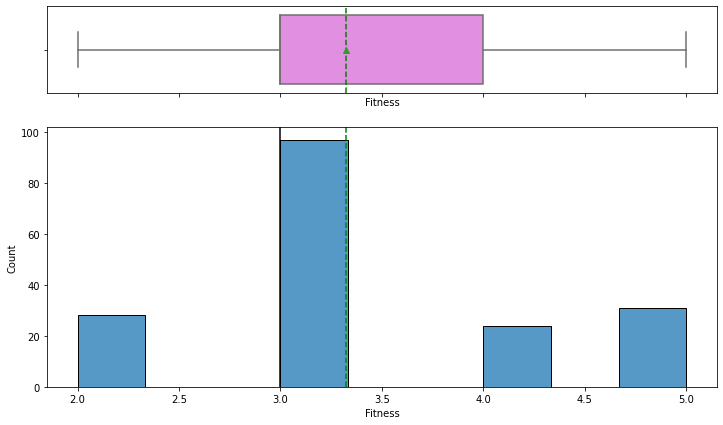

In [ ]:
df['Fitness'] = clip_Outliers(df,'Fitness',iqr_Scaling=1.0)
# Create the Box and Hist plot to check if the outliers are clipped
histogram_boxplot(df,'Fitness')

In [ ]:
print_Whisker_Values(df,'Fitness',iqr_Scaling=1.0)

Whisker details for Fitness Column:

 Left-side Whisker  : 2.0 
 Right-side Whisker : 5.0
 Total num outliers : 0

 The max Outlier values:
Series([], Name: Fitness, dtype: int64)

 The min Outlier values:
Series([], Name: Fitness, dtype: int64)


The Outliers of Fitness column is fixed

### 2.10.4 Fixing the Outliers of  Usage Column

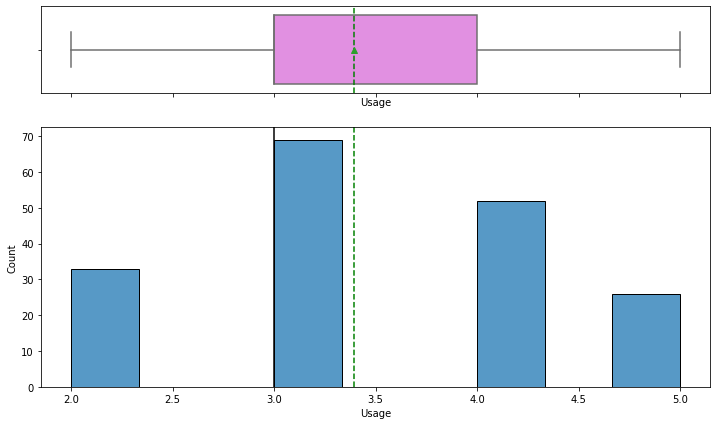

In [ ]:
df['Usage'] = clip_Outliers(df,'Usage',iqr_Scaling=1.0).astype(int)
# Create the Box and Hist plot to check if the outliers are clipped
histogram_boxplot(df,'Usage')

In [ ]:
print_Whisker_Values(df,'Usage',iqr_Scaling=1.0)

Whisker details for Usage Column:

 Left-side Whisker  : 2.0 
 Right-side Whisker : 5.0
 Total num outliers : 0

 The max Outlier values:
Series([], Name: Usage, dtype: int64)

 The min Outlier values:
Series([], Name: Usage, dtype: int64)


Outliers of the Usage columns is fixed

## 2.10.5 Review the Box plot after Outlier removals

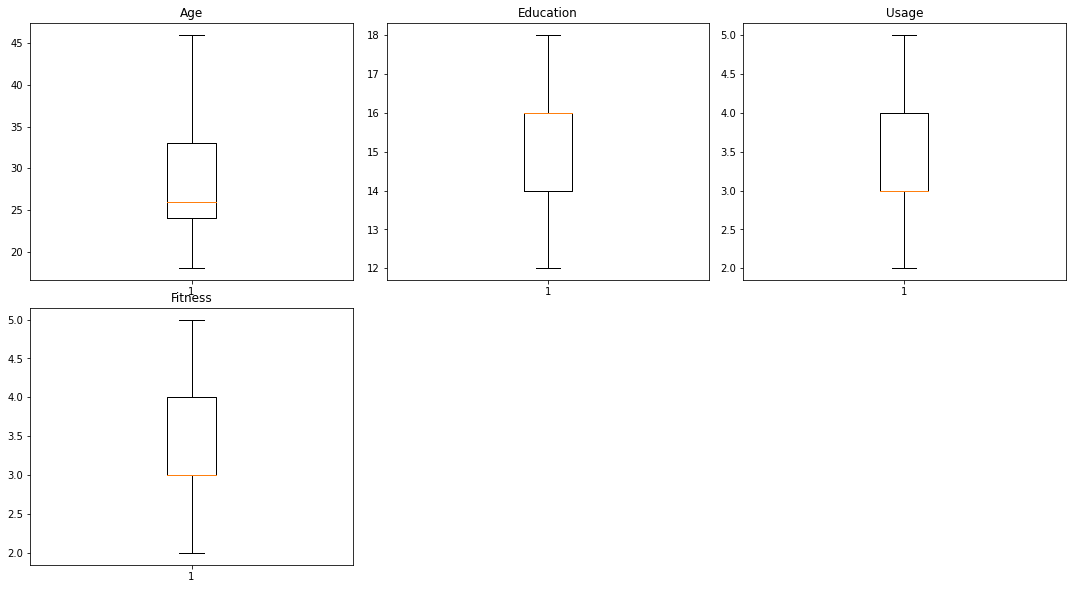

In [ ]:
#Outliers box plots of all numerical variables
numerical_columns = ["Age", "Education", "Usage", "Fitness"]
plt.figure(figsize=(15,12))

for i, col in enumerate(numerical_columns):
  plt.subplot(3,3,i+1)
  plt.boxplot(df[col],whis=1.5)
  plt.tight_layout()
  plt.title(col)

plt.show()

## 2.10.6 Column Statistics

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.00,28.73,6.79,18.00,24.00,26.00,33.00,46.00
Education,180.00,15.51,1.46,12.00,14.00,16.00,16.00,18.00
Usage,180.00,3.39,0.95,2.00,3.00,3.00,4.00,5.00
Fitness,180.00,3.32,0.94,2.00,3.00,3.00,4.00,5.00
Income,180.00,53719.58,16506.68,29562.00,44058.75,50596.50,58668.00,104581.00
Miles,180.00,103.19,51.86,21.00,66.00,94.00,114.75,360.00


#3.0 Multivariate Data Analysis

In this section the following analysis is done.


*   As a first step create a heatmap of all numeric columns to get the correlation
*   



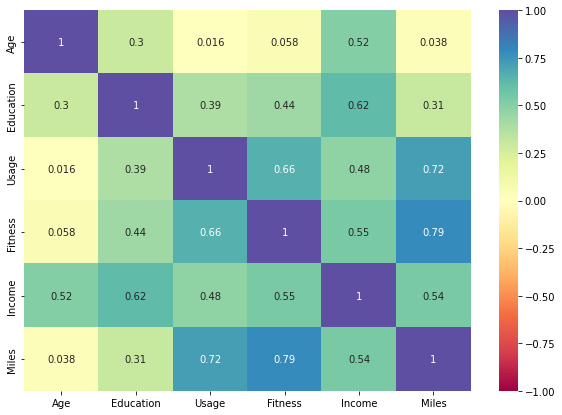

In [ ]:
# Get the heatmap of all numerical columns to understand the correlation
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

**Observation on the Correlations**


*   Age has stronger correlation with Income, as people who are older tend to earn more than people of younger age.
*   Age has low coorelation with usage of treadmill.
*   Education has stronger correlation with income as  educated people tend to earn more income
*   Usage of treadmill has strong coorelation with fitness as people who are considering themselves to be fit tend to use the treadmill more.
*   As expected, more the usage of treadmill will increase the number of miles expected to run.
*   Income seems to have a similar coorelation with Miles, fitness, usage, age and stronger coorelation with Education.
*   Miles, Fitness and usage of Treadmills are strongly correlated










**Income  Education lmPlot**

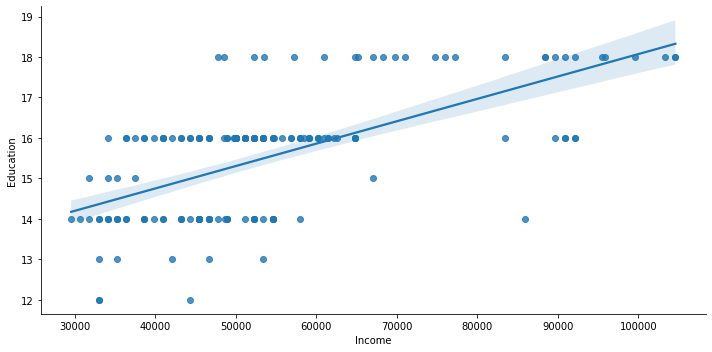

In [ ]:
# lm plot to find the trend between Education and. Income.
sns.lmplot(data=df,x='Income',y='Education',height=5,aspect=2)
plt.show()

**Observations on Education/Income Plot**

*   As per the plot above there is a clear positive relationship between education and  Income




**Education Gender Countplot**

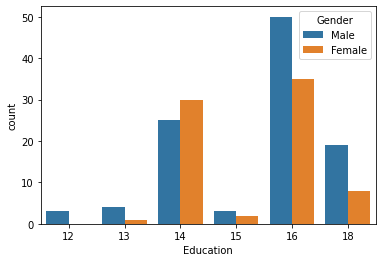

In [ ]:
sns.countplot(data=df, x='Education', hue='Gender');

**Observations on Education/Gender Plot**

There are more females wo have completed 14 years of education as compared to Male.

**Usage and Gender Countplot**

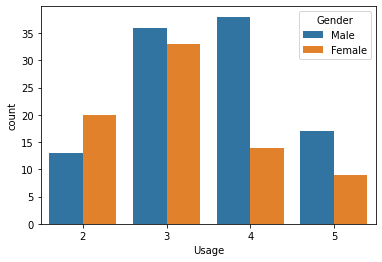

In [ ]:
sns.countplot(data=df, x='Usage', hue='Gender');

**Observations on Usage/Gender Plot**

More males want to use treadmill 4 times a week, than females

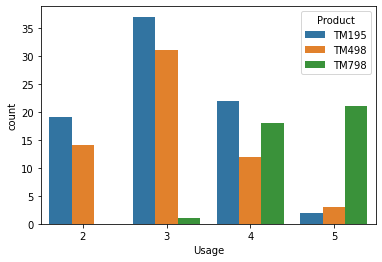

In [ ]:
sns.countplot(data=df, x='Usage', hue='Product');

**Observations of Product and Usage**

*   The people who use the treadmills more than 4 times a week tend to prefer TM798.




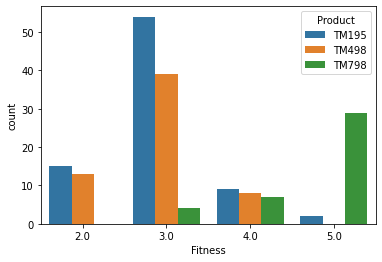

In [ ]:
sns.countplot(data=df, x='Fitness', hue='Product');

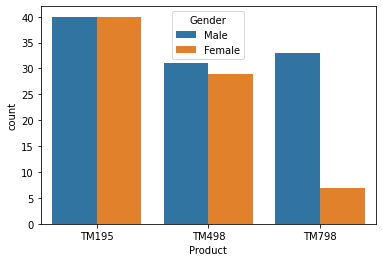

In [ ]:
sns.countplot(data=df, x='Product', hue='Gender');

**Observation on Product and Gender**

*   The Product TM798 is preferred by Male as compared to female
*   The Products TM195 and TM498 are equally used by Male and Female.



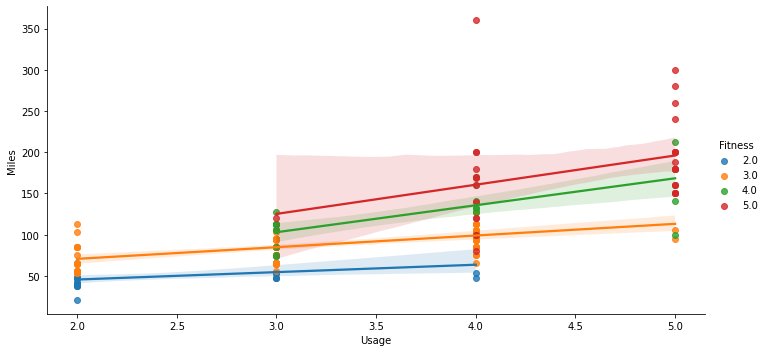

In [ ]:
# lm plot to find the trend between Usage , Fitness and Miles
sns.lmplot(data=df,x='Usage',y='Miles', hue='Fitness', height=5,aspect=2)
#plt.xlim(0,55)
plt.show()

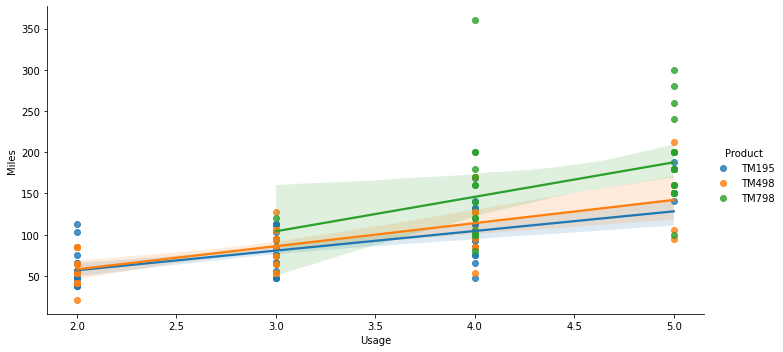

In [ ]:
# lm plot to find the trend between Usage , Fitness and Miles
sns.lmplot(data=df,x='Usage',y='Miles', hue='Product', height=5,aspect=2)
plt.show()

Product TM798 is preferred by customers wanting to run more than 100 miles.

The Customers using TM798 also tend to use the treadmill more number of times per week depending upon the miles they expect to run.

Product TM498 and TM195 are preferred by customers wanting to run 100 miles or less.

**Observation between Usage/Fitness and Miles**

*   Customers who expect to run more than 100 miles tend to use the Treadmills at least 3 times a week and upto 5.5 times a week




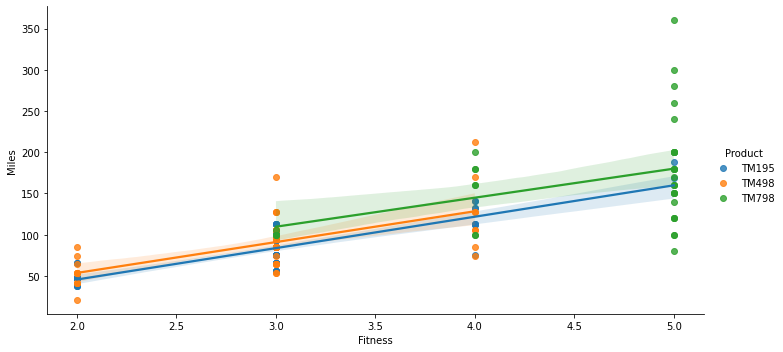

In [ ]:
# lm plot to find the trend between Usage , Fitness and Miles
sns.lmplot(data=df,x='Fitness',y='Miles', hue='Product', height=5,aspect=2)
plt.show()

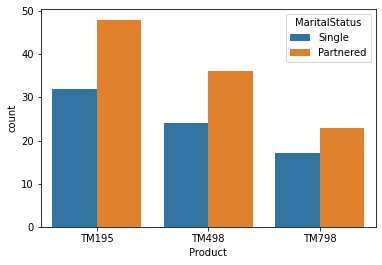

In [ ]:
sns.countplot(data=df, x='Product', hue='MaritalStatus');

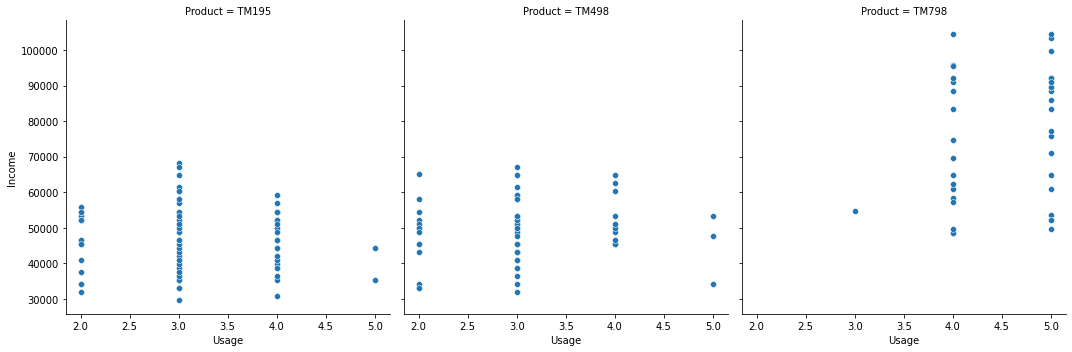

In [ ]:
sns.relplot(data=df,x='Usage',y='Income',col='Product',ci=None,col_wrap=3)
plt.show()

**Observations of Plot between Usage and Income by Product**


*   Higher Income people tend to use Treadmills more per week than lower income people
*   People who like to use treadmills more than 4 times per week Tend to use TM798.



# 4.0 Data Visualization

In this Section we  will do Data visualization across various columns and analyze the patterns


*   Use Pairplot to visualize the numerical columns with various  Categorical columns
*   



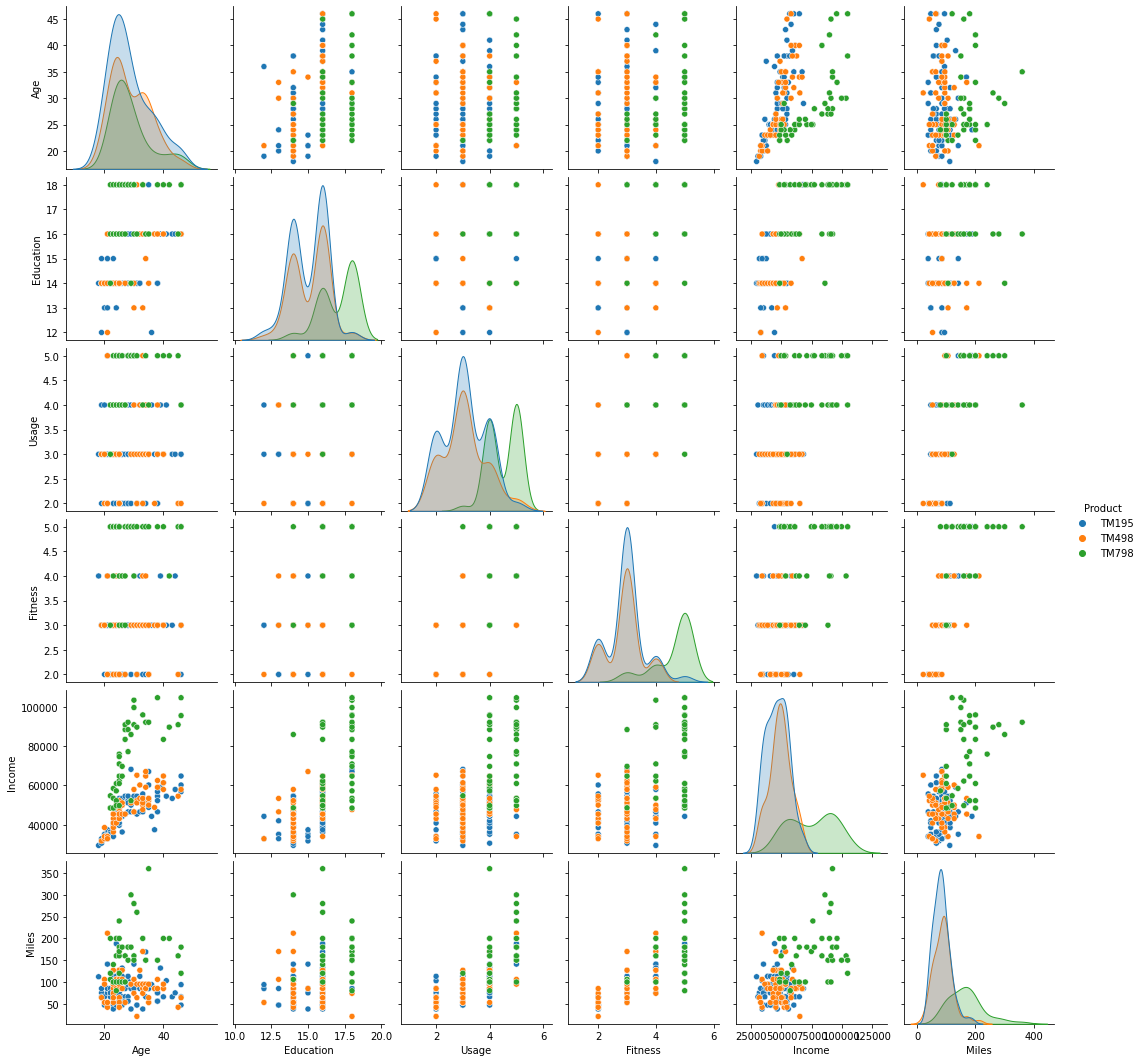

In [ ]:
# list of numerical columns in the data
numerical_columns = ["Age", "Education", "Usage", "Fitness", "Income", "Miles"]

sns.pairplot(data=df, vars=numerical_columns,  hue="Product");

**Obserbvation on Data Visualization Analysis**



*   25 to 30 year old who have high income tend to use TM798 treadmills.
*   Customers who tend to think they are fit (Fitness level 4 and above) tend to use TM798
*   Customers who they think are moderately fit (Fitness level around 3) tend to use  TM195 and TM498
*   List item



#5.0 Conclusion and Recommendations

**Conclusion**

*Customer Profile*

*   Male customers outnumber Female customers by 3:2 ( 104 male to 76 female)
*   There are 107 customers who are Partnered and 73 are Single
*   Older Customers have more Income
*   Higher Income Customers expect themselves to be fitter, want to use the Treadmills more than 3 times per week, have higher education



*Product Profile*


*   The Product TM798 is preferred by Male as compared to female
*   The Products TM195 and TM498 are equally used by Male and Female.

*   Product TM798 is preferred by customers wanting to run more than 100 miles.

*   The Customers using TM798 also tend to use the treadmill more number of times per week depending upon the miles they expect to run.

*   Product TM498 and TM195 are preferred by customers wanting to run 100 miles or less.

*   Customers who earn more than 67083 exclusively use  TM798 Machine.





**Recommendations**

*   There are only 40 of the TM798 machines and probably we may need to increase the number of machines of this type
*   The marketing should target towards 30 to 40 year old high income people
*   Machine usage of TM195 and TM498 will increase if fitness awareness among younger age group can be increased



